# 신경망의 수학적 구성 요소

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**케라스에서 MNIST 데이터셋 적재하기**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**신경망 구조**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**컴파일 단계**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**이미지 데이터 준비하기**

In [ ]:
train_images[0]

In [ ]:
# 0 ~ 1 사이로 스케일 조정
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
train_images[0]

**모델 훈련**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0073 - accuracy: 0.9984
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9991
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0025 - accuracy: 0.9996
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 0.9998


**모델을 사용해 예측 만들기**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 67ms/step


array([1.4755797e-10, 6.2014738e-13, 2.3176367e-08, 1.0618821e-06,
       8.0606135e-14, 1.8488157e-10, 6.5599072e-15, 9.9999881e-01,
       7.4844374e-11, 1.7479373e-07], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9999988

In [ ]:
test_labels[0]

7

**새로운 데이터에서 모델 평가하기**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9795
테스트 정확도: 0.9794999957084656


## 신경망을 위한 데이터 표현

### 스칼라 (랭크-0 텐서)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### 벡터 (랭크-1 텐서)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### 행렬 (랭크-2 텐서)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### 랭크-3 텐서와 더 높은 랭크의 텐서

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [ ]:
x.shape

(4, 3, 5)

### 핵심 속성

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.ndim

3

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# uint8은 8개의 비트로 256개의 서로 다른 값을 표현.
# 이미지 처리에서 많이 사용되는 데이터 형식 중 하나이며, 메모리 관리가 효율적이고 연산에도 효과적
train_images.dtype

dtype('uint8')

In [ ]:
train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

**다섯 번째 이미지 출력하기**

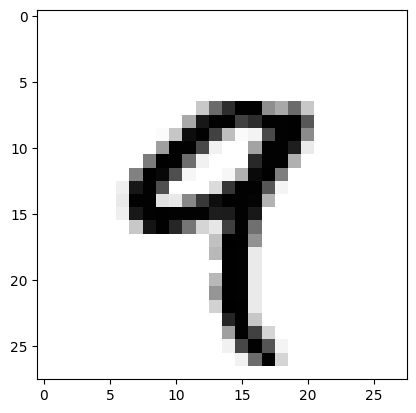

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

### 넘파이로 텐서 조작하기

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
# 정중앙에 위치한 14X14 픽셀 조각
my_slice = train_images[:, 7:-7, 7:-7]

### 배치 데이터

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### 텐서의 실제 사례

### 벡터 데이터

### 시계열 데이터 또는 시퀀스 데이터

### 이미지 데이터
- 3차원 이미지의 차원은 "가로 픽셀 수 x 세로 픽셀 수 x 이미지 슬라이스 수"로 표현
- 픽셀은 이미지를 구성하는 가장 작은 단위로, "picture element"의 줄임말이며 이미지를 표현하는 데 사용되는 점 또는 화소
- 흑백 이미지의 경우, 각 픽셀은 단일 색상 값을 가지며, 일반적으로 0부터 255까지의 범위로 표현. 0은 픽셀이 검은색에 가깝고, 255는 픽셀이 흰색에 가깝다.
- 컬러 이미지의 경우, 각 픽셀은 일반적으로 RGB(Red, Green, Blue) 값을 가지며 각각 빨강, 초록, 파랑의 강도를 나타내며, 0부터 255까지의 범위로 표현
- 강도의 조합에 따라 다양한 색상이 생성. 예를 들어, (255, 0, 0)은 빨간색, (0, 255, 0)은 초록색, (0, 0, 255)는 파란색
- 각 픽셀은 이미지의 위치에 따라 좌표로 식별. 가장 왼쪽 위 픽셀이 (0, 0)이며, 가로 방향으로 증가하면서 픽셀의 열 인덱스가 증가하고, 세로 방향으로 증가하면서 픽셀의 행 인덱스가 증가
- 이미지 처리 작업에서는 픽셀 단위의 조작이 중요하며, 픽셀 값을 수정하거나 분석하여 다양한 이미지 효과를 생성하거나 이미지에서 정보를 추출

### 비디오 데이터

## 신경망의 톱니바퀴: 텐서 연산

### 원소별 연산

In [ ]:
#  ReLU(Rectified Linear Unit) 함수를 구현
# x의 차원이 2가 아닐 경우 AssertionError를 발생시킵니다. 이는 프로그램 실행 중에 오류가 있음을 나타내며, 코드 실행이 중단
def naive_relu(x):
    assert len(x.shape) == 2 #  x의 차원이 2인지 확인
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
# 넘파이 내장함수 원소별 연산 속도
import numpy as np
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 1.87 s


### 브로드캐스팅

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
y

array([[0.88317587, 0.04876954, 0.37776539, 0.61576261, 0.86366707,
        0.56483472, 0.42187012, 0.51739509, 0.81800205, 0.40638847]])

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
Y[:2]

array([[0.88317587, 0.04876954, 0.37776539, 0.61576261, 0.86366707,
        0.56483472, 0.42187012, 0.51739509, 0.81800205, 0.40638847],
       [0.88317587, 0.04876954, 0.37776539, 0.61576261, 0.86366707,
        0.56483472, 0.42187012, 0.51739509, 0.81800205, 0.40638847]])

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2 # x의 차원이 2인지 확인
    assert len(y.shape) == 1 # y의 차원이 1인지 확인
    assert x.shape[1] == y.shape[0] # x의 두 번째 차원의 길이가 y의 첫 번째(그리고 유일한) 차원의 길이와 같은지 확인
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j] # x의 i번째 행, j번째 열의 원소와 y의 j번째 원소를 더하고, 그 결과를 x의 해당 위치에 저장
    return x

In [ ]:
# 덧셈
x = np.arange(10).reshape(2,5)
print(x)
y = np.arange(5)
print(y)
naive_add_matrix_and_vector(x,y)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4]


array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13]])

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [ ]:
z

### 텐서 곱셈

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
print(x.shape,y.shape)
z

(32,) (32,)


8.513753935513368

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
naive_vector_dot(x, y)

8.51375393551337

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
x = np.arange(6).reshape(2,3)
y = np.arange(3)
naive_matrix_vector_dot(x, y)

array([ 5., 14.])

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
naive_matrix_vector_dot(x, y)

array([ 5., 14.])

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [ ]:
x = np.arange(6).reshape(2,3)
y = np.arange(6).reshape(3,2)
naive_matrix_dot(x, y)

array([[10., 13.],
       [28., 40.]])

### 텐서 크기 변환

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### 텐서 연산의 기하학적 해석

### 딥러닝의 기하학적 해석

## 신경망의 엔진: 그레이디언트 기반 최적화

### 도함수란?

### 텐서 연산의 도함수: 그레이디언트

### 확률적 경사 하강법

### 도함수 연결: 역전파 알고리즘

#### 연쇄 법칙

#### 계산 그래프를 활용한 자동 미분

#### 텐서플로의 그레이디언트 테이프

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

#### TensorFlow를 사용하여 변수 x에 대한 식 y = 2 * x + 3의 그래디언트(기울기)를 계산하고 tape.gradient()를 사용하여 y에 대한 x의 그래디언트를 계산. 이를 통해 x의 값을 조정할 때 y가 어떻게 변화하는지를 알 수 있으며, 이는 모델의 최적화와 역전파 알고리즘에서 매우 유용.
- TensorFlow 변수 x를 생성합니다. tf.zeros((2, 2))를 사용하여 크기가 2x2이고 모든 요소가 0인 행렬로 초기화
- tf.GradientTape()를 사용하여 GradientTape 컨텍스트를 생성하고 tape를 사용하여 연산을 기록
- y = 2 * x + 3의 연산을 수행하고 결과를 변수 y에 저장. 이 때, TensorFlow의 브로드캐스팅(broadcasting) 기능을 사용하여 x의 각 요소에 2를 곱하고 3을 더함.
- tape.gradient()를 사용하여 y에 대한 x의 그래디언트를 계산. 이를 통해 y를 x에 대해 미분한 결과, 즉 y에 대한 x의 기울기를 구한다. tape.gradient()의 첫 번째 인자로는 그래디언트를 계산하고자 하는 결과값(y)을 전달하고, 두 번째 인자로는 그래디언트를 계산하고자 하는 변수(x)를 전달.
- grad_of_y_wrt_x에는 y에 대한 x의 그래디언트가 저장된다.

In [ ]:
x = tf.Variable(tf.zeros((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [ ]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.526029 , 0.526029 ],
        [1.4438349, 1.4438349]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## 첫 번째 예제 다시 살펴보기

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2594 - accuracy: 0.9247
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1055 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0695 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0503 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0384 - accuracy: 0.9889


### 텐서플로를 사용해 첫 번째 예제를 밑바닥부터 다시 구현하기

#### 단순한 Dense 클래스

@property
- 파이썬의 데코레이터(decorator) 중 하나로, 클래스의 메서드를 속성(property)처럼 사용할 수 있도록 해주는 기능
- @property는 클래스의 인터페이스를 단순화하고 읽기 및 쓰기 속성을 통합하는 데 유용
- 클래스의 내부 구현을 숨기고 사용자가 더 직관적이고 편리한 방식으로 클래스의 속성을 사용

In [ ]:
# TensorFlow를 사용하여 단순한 밀집(Dense) 계층을 구현한 NaiveDense 클래스
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        # W는 input_size와 output_size에 맞는 크기로 난수로 초기화
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)
        # b는 0으로 초기화
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs): # __call__: 클래스 객체를 함수처럼 호출할 수 있도록 해주는 메서드
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self): # weights를 호출하면 [self.W, self.b]로 구성된 리스트가 반환
        return [self.W, self.b]

#### 단순한 Sequential 클래스

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### 배치 제너레이터

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### 훈련 스텝 실행하기

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### 전체 훈련 루프

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
0번째 배치 손실: 6.65
100번째 배치 손실: 2.27
200번째 배치 손실: 2.24
300번째 배치 손실: 2.13
400번째 배치 손실: 2.24
에포크 1
0번째 배치 손실: 1.94
100번째 배치 손실: 1.91
200번째 배치 손실: 1.86
300번째 배치 손실: 1.75
400번째 배치 손실: 1.85
에포크 2
0번째 배치 손실: 1.61
100번째 배치 손실: 1.60
200번째 배치 손실: 1.54
300번째 배치 손실: 1.46
400번째 배치 손실: 1.52
에포크 3
0번째 배치 손실: 1.35
100번째 배치 손실: 1.36
200번째 배치 손실: 1.27
300번째 배치 손실: 1.24
400번째 배치 손실: 1.28
에포크 4
0번째 배치 손실: 1.15
100번째 배치 손실: 1.17
200번째 배치 손실: 1.07
300번째 배치 손실: 1.07
400번째 배치 손실: 1.11
에포크 5
0번째 배치 손실: 1.00
100번째 배치 손실: 1.03
200번째 배치 손실: 0.93
300번째 배치 손실: 0.95
400번째 배치 손실: 0.99
에포크 6
0번째 배치 손실: 0.89
100번째 배치 손실: 0.92
200번째 배치 손실: 0.82
300번째 배치 손실: 0.86
400번째 배치 손실: 0.90
에포크 7
0번째 배치 손실: 0.81
100번째 배치 손실: 0.83
200번째 배치 손실: 0.74
300번째 배치 손실: 0.79
400번째 배치 손실: 0.83
에포크 8
0번째 배치 손실: 0.74
100번째 배치 손실: 0.76
200번째 배치 손실: 0.67
300번째 배치 손실: 0.73
400번째 배치 손실: 0.78
에포크 9
0번째 배치 손실: 0.69
100번째 배치 손실: 0.71
200번째 배치 손실: 0.62
300번째 배치 손실: 0.68
400번째 배치 손실: 0.74


### 모델 평가하기

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.81


## 요약